In [202]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split

In [14]:
def get_obj(Beta,X,Y):
    k = np.unique(Y).size - 1
    n,_ = X.shape
    P = Beta @ (X.T)
    P = np.exp(P)
    sum_obj = 0
    for i in range(n):
        if Y[i] in range(k):
            sum_obj += np.log((1 + np.sum(P[:,i])) / P[Y[i],i])
        else:
            sum_obj += np.log(1 + np.sum(P[:,i]))
    return sum_obj


In [15]:
def get_grad(Beta,X,Y):
    k = np.unique(Y).size - 1
    n,m = X.shape
    P = Beta @ (X.T)
    P = np.exp(P)
    grad = np.zeros((k,m))
    for i in range(n):
        for j in range(k):
            if Y[i] == j:
                grad[j,:] += (P[j,i] / (1 + np.sum(P[:,i])) - 1) * X[i]
            else:
                grad[j,:] += (P[j,i] / (1 + np.sum(P[:,i]))) * X[i]
    return grad    

In [69]:
def Armijo(obj,raw_obj,d,Beta,X,Y,alpha,gamma=0.5):
    while obj(Beta - alpha * d,X,Y) > raw_obj - 0.001 * alpha * np.sum(d * d):
        alpha = gamma * alpha 
    return alpha

In [205]:
def gradient_descent(X,Y):
    n,m = X.shape
    k = np.unique(Y).size - 1
    X = np.concatenate((X,np.ones((n,1))),axis=1)
    Beta = np.zeros((k,m+1))
    iters = 0
    count = 0
    oldBeta = np.zeros((k,m+1))
    alpha = 1
    raw_obj = get_obj(Beta,X,Y)
    while iters < 1000 and count < 5:
        d = get_grad(Beta,X,Y)
#         print(d)
        print("The objective value is %f"%raw_obj)
        if raw_obj > 500:
            alpha = 0.0001
        elif raw_obj > 200:
            alpha = 0.001
        elif raw_obj > 50:
            alpha = 0.01
        elif raw_obj > 30:
            alpha = 0.02
        elif raw_obj >10:
            alpha = 0.05
        else:
            alpha = 0.1
        alpha = Armijo(get_obj,raw_obj,d,Beta,X,Y,alpha)
        print(alpha)
        Beta = Beta - alpha * d
#         print(Beta)
        new_obj = get_obj(Beta,X,Y)
        if np.abs(new_obj - raw_obj) < 0.0001:
            count += 1
        raw_obj = new_obj
        print("第%d次迭代结束"%iters)
        iters += 1
    return Beta

In [194]:
def get_prob(Beta,X):
    k = Beta.shape[0]
    n = X.shape[0]
    X = np.concatenate((X,np.ones((n,1))),axis=1)
    P = Beta @ (X.T)
    P = np.exp(P)
    Prob = np.zeros((n,k+1))
    for i in range(n):
        for j in range(k):
            Prob[i,j] = P[j,i] / (1 + np.sum(P[:,i]))
        Prob[i,k] = 1 / (1 + np.sum(P[:,i]))
    return Prob

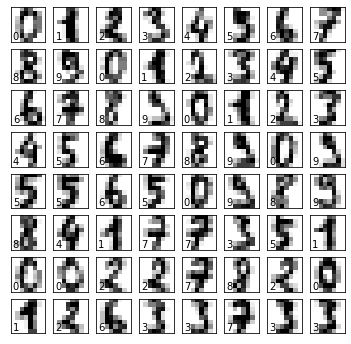

In [237]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# plot the digits
fig = plt.figure(figsize=(6, 6))  # figure size in inches
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [210]:
X = digits.data
Y = digits.target


In [211]:
from sklearn.metrics import accuracy_score as acc

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size=0.33, random_state=42)

In [213]:
Beta = gradient_descent(X_train,Y_train)


The objective value is 2770.009867
0.0001
第0次迭代结束
The objective value is 1369.607663
1.25e-05
第1次迭代结束
The objective value is 778.654671
1.25e-05
第2次迭代结束
The objective value is 675.142288
1.25e-05
第3次迭代结束
The objective value is 649.363779
6.25e-06
第4次迭代结束
The objective value is 564.192813
1.25e-05
第5次迭代结束
The objective value is 547.746202
6.25e-06
第6次迭代结束
The objective value is 495.786303
7.8125e-06
第7次迭代结束
The objective value is 469.476842
1.5625e-05
第8次迭代结束
The objective value is 453.347910
7.8125e-06
第9次迭代结束
The objective value is 428.498569
7.8125e-06
第10次迭代结束
The objective value is 416.015579
1.5625e-05
第11次迭代结束
The objective value is 407.751408
7.8125e-06
第12次迭代结束
The objective value is 395.800814
7.8125e-06
第13次迭代结束
The objective value is 386.635809
1.5625e-05
第14次迭代结束
The objective value is 381.346156
7.8125e-06
第15次迭代结束
The objective value is 372.314917
1.5625e-05
第16次迭代结束
The objective value is 369.581822
7.8125e-06
第17次迭代结束
The objective value is 360.538381
1.5625e-05
第18次迭代结

<ipython-input-14-1a0ce4621935>:9: RuntimeWarning: overflow encountered in double_scalars
  sum_obj += np.log((1 + np.sum(P[:,i])) / P[Y[i],i])


The objective value is 196.733380
1.953125e-05
第73次迭代结束
The objective value is 195.895586
1.953125e-05
第74次迭代结束
The objective value is 195.773586
9.765625e-06
第75次迭代结束
The objective value is 193.414359
3.90625e-05
第76次迭代结束
The objective value is 192.688040
9.765625e-06
第77次迭代结束
The objective value is 190.402281
3.90625e-05
第78次迭代结束
The objective value is 189.532807
9.765625e-06
第79次迭代结束
The objective value is 187.511346
3.90625e-05
第80次迭代结束
The objective value is 186.399063
9.765625e-06
第81次迭代结束
The objective value is 184.738817
7.8125e-05
第82次迭代结束
The objective value is 184.525026
9.765625e-06
第83次迭代结束
The objective value is 180.084654
3.90625e-05
第84次迭代结束
The objective value is 179.718890
9.765625e-06
第85次迭代结束
The objective value is 177.561388
3.90625e-05
第86次迭代结束
The objective value is 176.383451
1.953125e-05
第87次迭代结束
The objective value is 176.142812
9.765625e-06
第88次迭代结束
The objective value is 174.299242
3.90625e-05
第89次迭代结束
The objective value is 173.572120
9.765625e-06
第90次迭代结束


In [214]:
Prob = get_prob(Beta,X_test)
result = np.argmax(Prob,axis=1)

In [215]:
print(acc(Y_test,result))
#比库自带的好一点

0.9696969696969697


In [216]:
LR().fit(X_train,Y_train).score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [261]:
wrongim = []
for i in range(result.size):
    if result[i] != Y_test[i]:
        wrongim.append((i,X_test[i].reshape(8,8)))

In [262]:
len(wrongim)

18

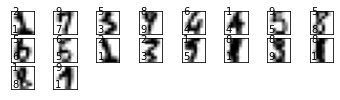

In [264]:
fig = plt.figure()
for i in range(len(wrongim)):
    ax = fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
    ax.imshow(wrongim[i][1],cmap=plt.cm.binary)
    ax.text(0, 1, str(result[wrongim[i][0]]))
    ax.text(0, 7, str(Y_test[wrongim[i][0]]))